# import

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

In [2]:
df1 = pd.read_csv("fashion-mnist-train-1.csv")
df2 = pd.read_csv("fashion-mnist-train-2.csv")

In [3]:
print(df1.shape)
print(df2.shape)

(14999, 785)
(29999, 785)


In [4]:
df = df1.append(df2, ignore_index=True)

C:\Users\jb\AppData\Local\Temp\ipykernel_2660\1593761221.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True)


In [5]:
y = list(df["label"])
x = df.drop("label", axis=1)

In [6]:
x = np.array(x)

In [7]:
x.shape

(44998, 784)

In [8]:
def convert_to_images(data):
    data = np.array(data)
    data = data.reshape(-1, 28, 28, 1)
    return data

In [9]:
x = convert_to_images(x)
print(x.shape) # (44998, 28, 28, 1)

(44998, 28, 28, 1)


In [10]:
x.shape

(44998, 28, 28, 1)

In [11]:
id2class = {0: "T-shirt/top",
            1: "Trouser",
            2: "Pullover",
            3: "Dress",
            4: "Coat",
            5: "Sandal",
            6: "Shirt",
            7: "Sneaker",
            8: "Bag",
            9: "Ankle boot",}

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

train_size = int(len(x) * 0.8)
test_size = len(x) - train_size

print(train_size)
print(test_size)

# the data, split between train and test sets
x_train, x_test = x[0:train_size], x[train_size:len(x)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_test_inf, y_test_inf = x_test.copy(), y_test.copy()

35998
9000


In [13]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

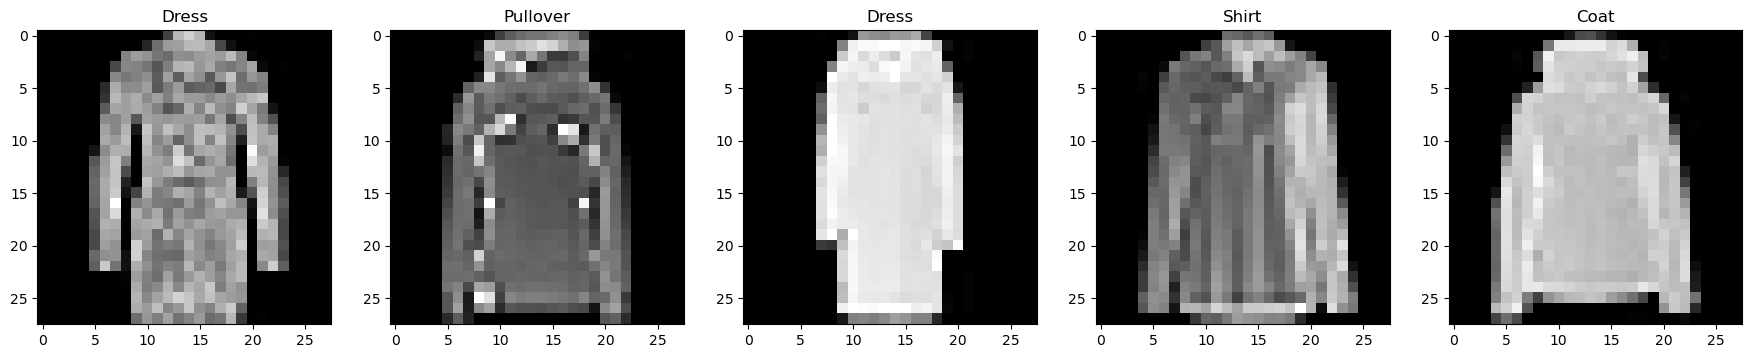

In [14]:
idx = np.random.randint(0, high=len(x_train), size=5)
figs, axes = plt.subplots(ncols=5, figsize=(22, 4))
for ax, i in zip(axes, idx): 
    ax.imshow(x_train[i], cmap='gray');
    ax.set_title(id2class[y_train[i]])

In [15]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [16]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (35998, 28, 28, 1)
35998 train samples
9000 test samples


# create model

In [42]:
#model = keras.Sequential(
#    [
#        keras.Input(shape=input_shape),
#        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#        layers.MaxPooling2D(pool_size=(2, 2)),
#        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#        layers.MaxPooling2D(pool_size=(2, 2)),
#        #layers.Conv2D(16, kernel_size=(1, 1), activation="relu"),
#        layers.Flatten(),
#        layers.Dropout(0.5),
#        layers.Dense(num_classes, activation="softmax"),
#    ]
#)
#
#model.summary()

In [ ]:
#batch_size = 128
#epochs = 5
#
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#
#model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [20]:
model = keras . Sequential ([ 
    keras.layers.Flatten ( input_shape =input_shape ) , 
    keras.layers.Dense (254 , activation ='relu') ,
    keras.layers.Dense (10 , activation ='softmax') ])

model.compile(  optimizer ='adam',
                loss ='sparse_categorical_crossentropy',
                metrics =[ 'accuracy'])

for i in range(0,5) : 
    model.fit(x_train , y_train , epochs = 1)

0
1125/1125 [==============================] - 5s 4ms/step - loss: 0.5218 - accuracy: 0.8153
1
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3820 - accuracy: 0.8610
2
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3304 - accuracy: 0.8780
3
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2970 - accuracy: 0.8899
4
1125/1125 [==============================] - 5s 4ms/step - loss: 0.2669 - accuracy: 0.9009


In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36447882652282715
Test accuracy: 0.8721110820770264


# save

In [22]:
model.save("fashion_mnist")

INFO:tensorflow:Assets written to: fashion_mnist\assets


# predict

In [43]:
idx = 12

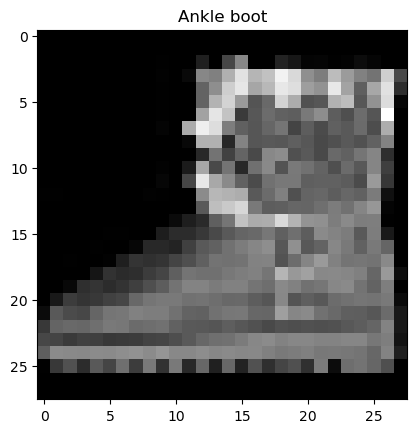

In [44]:
im = x_train[idx]

im = im.reshape(28, 28,1)

plt.imshow(im, cmap="gray")

plt.title(id2class[y_train[idx]]);

In [45]:
im = im.astype("float32") / 255

im = np.expand_dims(im, -1)[None]

im.shape

(1, 28, 28, 1, 1)

In [47]:
f"Predicted Class: {id2class[np.argmax(model.predict(im))]}"

1/1 [==============================] - 0s 38ms/step


'Predicted Class: Sandal'

In [39]:
#print(x_test_inf[idx].tolist())

# try API

In [ ]:
import requests
import json

idx = 12
im = x_test_inf[idx].tolist()

data = {'image': im}
URL = 'http://90.3.11.174:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
print(f"label = {id2class[y_test_inf[idx]]}")

In [95]:
import requests
import json

idx = 12
im = x_test_inf[idx].tolist()

data = {'image': im}
URL = 'http://172.17.0.2:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
print(f"label = {id2class[y_test_inf[idx]]}")

ConnectionError: HTTPConnectionPool(host='172.17.0.2', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024699F0FE20>: Failed to establish a new connection: [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu'))

In [99]:

        
import requests
import json

idx = 12
im = x_test_inf[idx].tolist()

data = {'image': im}
URL = 'http://127.0.0.1:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
print(f"label = {id2class[y_test_inf[idx]]}")

Prediction = <!doctype html>
<html lang=en>
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>

label = Coat
